 # Part 1


# 2. Which republican candidate will win in each county?

By GROUP4: Stijn Uijen, Leon van Veldhuijzen and Max van Splunteren.

This file contains the code for the republicans of Part I of the group assigment. 
The following steps had to be taken:

1. First, we ask you to create the best possible model using the techniques
 you’ve learned in this course. For this question use the typical 75%/25%
 train/test split (make sure you split the data by a date of the primary
 election).

2. Second, show how performance of your best model on the test set decreases
 as the size of the training set decreases, visualize this result. Make sure
 you do allow the regularization parameter to vary for different training set
 sizes, also visualize how the optimal regularization parameter varies as the
 size of the training set changes.

3. Third, show which features are most important to make good predictions.

#### Acknowledgements
Parts of the code here were inspired by lectures and materials from Dr. Stevan Rudinac and Rens Dimmendaal
and the book 'Introduction to Machine Learning with Python' by A. C. Muller and S. Guido. 

# Import and Prepare Data

In [1]:
import pandas as pd

county = 'county_facts.csv'

results = 'primary_results.csv'

county_data = pd.read_csv(county)

results_data = pd.read_csv(results)

In [2]:
### filter for democratic results 
republican_results = results_data[results_data['party'].isin(['Republican'])]
          
print(set(republican_results['candidate']))

{'Carly Fiorina', 'Chris Christie', 'Jeb Bush', 'Rick Santorum', 'Ben Carson', 'Ted Cruz', 'Mike Huckabee', 'Rand Paul', 'Donald Trump', 'John Kasich', 'Marco Rubio'}


In [3]:
# drop all 'whole' state rows and the USA row by checking if 'state_abbreviation' == NaN

# first make a list with indexes of the rows that have to be deleted 
indexes = []

index = 0 

for index, row in county_data.iterrows():
    
    if pd.isnull(row['state_abbreviation']):
        
        indexes.append(index)
        
    index += 1

# now drop these rows by index
county_data = county_data.drop(county_data.index[indexes])

# Create y variable: 'republican_winner'

In [4]:
# create a dictionary with fips (unique country code) as key and as values and loop over 
# the result data for each candidate. In the first loop the percentage of votes for 
# the first canditate will fill all values of the dict. But in the following loops
# the value will be upgraded by if the other candidate had a higher percentage of the vote 


# 'John Kasich', 'Rand Paul', 'Donald Trump', 'Carly Fiorina', 'Rick Santorum', 'Ted Cruz', 'Jeb Bush', 
# 'Mike Huckabee', 'Ben Carson', 'Marco Rubio', 'Chris Christie'}


rep_winners = {}
rep_winners_fips_missing = {}


for index, row in republican_results.iterrows():
    
    if pd.isnull(row['fips']) and row['candidate'] == 'Donald Trump':
        
        rep_winners_fips_missing[row['county']] = [row['state_abbreviation'], row['fraction_votes'],
                                                   'Donald Trump']
    
    elif row['candidate'] == 'Donald Trump':
        rep_winners[row['fips']] = ['Donald Trump', row['fraction_votes']]
    

In [5]:
# now check for the counties where fips are missing, who are all in new Hampshire, if 
# an other candite scored higher then Trump

for index, row in republican_results.iterrows():
    
    if pd.isnull(row['fips']):
    
        if row['candidate'] == 'Rand Paul' and row['fraction_votes'] > rep_winners_fips_missing[row['county']][1]:
            rep_winners_fips_missing[row['county']] = [row['state_abbreviation'],row['fraction_votes'], 'Rand Paul']

        elif row['candidate'] == 'John Kasich' and row['fraction_votes'] > rep_winners_fips_missing[row['county']][1]:
            rep_winners_fips_missing[row['county']] = [row['state_abbreviation'],row['fraction_votes'], 'John Kasich']

        elif row['candidate'] == 'Carly Fiorina' and row['fraction_votes'] > rep_winners_fips_missing[row['county']][1]:
            rep_winners_fips_missing[row['county']] = [row['state_abbreviation'],row['fraction_votes'], 'Carly Fiorina']

        elif row['candidate'] == 'Rick Santorum' and row['fraction_votes'] > rep_winners_fips_missing[row['county']][1]:
            rep_winners_fips_missing[row['county']] = [row['state_abbreviation'],row['fraction_votes'], 'Rick Santorum']

        elif row['candidate'] == 'Ted Cruz' and row['fraction_votes'] > rep_winners_fips_missing[row['county']][1]:
            rep_winners_fips_missing[row['county']] = [row['state_abbreviation'],row['fraction_votes'], 'Ted Cruz']

        elif row['candidate'] == 'Jeb Bush' and row['fraction_votes'] > rep_winners_fips_missing[row['county']][1]:
            rep_winners_fips_missing[row['county']] = [row['state_abbreviation'],row['fraction_votes'], 'Jeb Bush']
            
        elif row['candidate'] == 'Mike Huckabee' and row['fraction_votes'] > rep_winners_fips_missing[row['county']][1]:
            rep_winners_fips_missing[row['county']] = [row['state_abbreviation'],row['fraction_votes'], 'Mike Huckabee']

        elif row['candidate'] == 'Ben Carson'and row['fraction_votes'] > rep_winners_fips_missing[row['county']][1]:
            rep_winners_fips_missing[row['county']] = [row['state_abbreviation'],row['fraction_votes'], 'Ben Carson']
                                                                                                  
        elif row['candidate'] == 'Marco Rubio' and row['fraction_votes'] > rep_winners_fips_missing[row['county']][1]:
            rep_winners_fips_missing[row['county']] = [row['state_abbreviation'],row['fraction_votes'], 'Marco Rubio']

        elif row['candidate'] == 'Chris Christie' and row['fraction_votes'] > rep_winners_fips_missing[row['county']][1]:
            rep_winners_fips_missing[row['county']] = [row['state_abbreviation'],row['fraction_votes'], 'Chris Christie']
        

In [6]:
print(rep_winners_fips_missing)

# We can see below that Trump has won in all the counties where the fip is missing.
# We can thus assume that when creating the y variable that if a row has fip missing 
# that Trump is the winner. 

{'Belknap': ['NH', 0.3601098972983581, 'Donald Trump'], 'Carroll': ['NH', 0.34539147670961345, 'Donald Trump'], 'Cheshire': ['NH', 0.3449506454062263, 'Donald Trump'], 'Coos': ['NH', 0.3829152780213997, 'Donald Trump'], 'Grafton': ['NH', 0.3042803006771448, 'Donald Trump'], 'Hillsborough': ['NH', 0.3537244754732641, 'Donald Trump'], 'Merrimack': ['NH', 0.3381749776420884, 'Donald Trump'], 'Rockingham': ['NH', 0.3937096398261513, 'Donald Trump'], 'Strafford': ['NH', 0.3437602281759948, 'Donald Trump'], 'Sullivan': ['NH', 0.3809523809523809, 'Donald Trump']}


In [7]:
# now check for all the rows where fips are present:

for index, row in republican_results.iterrows():
    
    # skip rows where the fip is missing, already did these above.
    if pd.isnull(row['fips']):
        continue 
    
    elif row['candidate'] == 'Rand Paul' and row['fraction_votes'] > rep_winners[row['fips']][1]:
        rep_winners[row['fips']] = ['Rand Paul', row['fraction_votes']]
    
    elif row['candidate'] == 'John Kasich' and row['fraction_votes'] > rep_winners[row['fips']][1]:
        rep_winners[row['fips']] = ['John Kasich', row['fraction_votes']]
    
    elif row['candidate'] == 'Carly Fiorina' and row['fraction_votes'] > rep_winners[row['fips']][1]:
        rep_winners[row['fips']] = ['Carly Fiorina', row['fraction_votes']]
        
    elif row['candidate'] == 'Rick Santorum' and row['fraction_votes'] > rep_winners[row['fips']][1]:
        rep_winners[row['fips']] = ['Rick Santorum', row['fraction_votes']]
        
    elif row['candidate'] == 'Ted Cruz' and row['fraction_votes'] > rep_winners[row['fips']][1]:
        rep_winners[row['fips']] = ['Ted Cruz', row['fraction_votes']]
        
    elif row['candidate'] == 'Jeb Bush' and row['fraction_votes'] > rep_winners[row['fips']][1]:
        rep_winners[row['fips']] = ['Jeb Bush', row['fraction_votes']]
        
    elif row['candidate'] == 'Mike Huckabee' and row['fraction_votes'] > rep_winners[row['fips']][1]:
        rep_winners[row['fips']] = ['Mike Huckabee', row['fraction_votes']]
        
    elif row['candidate'] == 'Ben Carson'and row['fraction_votes'] > rep_winners[row['fips']][1]:
        rep_winners[row['fips']] = ['Ben Carson', row['fraction_votes']]
    
    elif row['candidate'] == 'Marco Rubio' and row['fraction_votes'] > rep_winners[row['fips']][1]:
        rep_winners[row['fips']] = ['Marco Rubio', row['fraction_votes']]
    
    elif row['candidate'] == 'Chris Christie' and row['fraction_votes'] > rep_winners[row['fips']][1]:
        rep_winners[row['fips']] = ['Chris Christie', row['fraction_votes']]
    
    

In [8]:
# create the y column: 'republican_winner'. Set values to 0 for now. Merge with the county data.

republican_winner = {'republican_winner' : [0] * len(county_data['fips'])}

republican_winner_df = pd.DataFrame(data = republican_winner)

republican_data = pd.concat([county_data ,republican_winner_df], axis = 1)




In [9]:
# Now set the values of the 'republican_winner' column to winner. Value stays 0 if 
# the county code is not in the result data-set, and therefore missing

for index, row in republican_data.iterrows():
    
    # this is the if statement for where country fip is missing and berny is thus the winner. 
    if pd.isnull(row['fips']): 
        if row['area_name'] in rep_winners_fips_missing:
            republican_data.loc[index, 'republican_winner'] = 'Donald Trump'
    
    # otherwise look in the winner dict to see who was the winner
    elif row['fips'] in rep_winners:
        republican_data.loc[index, 'republican_winner'] = rep_winners[row['fips']][0]
    
    
    
# print(republican_data)    

In [10]:
# remove all the rows where the y variable is missing : value 0

republican_data_clean = republican_data[republican_data['republican_winner'].isin \
                                        (['John Kasich', 'Rand Paul', 'Donald Trump', 
                                        'Carly Fiorina', 'Rick Santorum', 'Ted Cruz', 'Jeb Bush', 
                                        'Mike Huckabee', 'Ben Carson', 'Marco Rubio', 'Chris Christie'])]

# threshold for dropping row due to missing values is 55 (all features) - 1 (y variable) = 54
republican_data_clean = republican_data_clean.dropna(axis=0, thresh = 54)

In [11]:
# rename column names
republican_data_clean.rename(index=str, columns={
'PST045214':"Population: 2014 estimate",
'PST040210':"Population: 2010 (April 1) estimates base",
'PST120214':"Population: percent change - April 1: 2010 to July 1: 2014",
'POP010210':"Population: 2010",
'AGE135214':"Persons under 5 years: percent: 2014",
'AGE295214':"Persons under 18 years: percent: 2014",
'AGE775214':"Persons 65 years and over: percent: 2014",
'SEX255214':"Female persons: percent: 2014",
'RHI125214':"White alone: percent: 2014",
'RHI225214':"Black or African American alone: percent: 2014",
'RHI325214':"American Indian and Alaska Native alone: percent: 2014",
'RHI425214':"Asian alone: percent: 2014",
'RHI525214':"Native Hawaiian and Other Pacific Islander alone: percent: 2014",
'RHI625214':"Two or More Races: percent: 2014",
'RHI725214':"Hispanic or Latino: percent: 2014",
'HI825214':"White alone: not Hispanic or Latino: percent: 2014",
'POP715213':"Living in same house 1 year & over: percent: 2009-2013",
'POP645213':"Foreign born persons: percent: 2009-2013",
'POP815213':"Language other than English spoken at home: pct age 5+: 2009-2013",
'EDU635213':"High school graduate or higher: percent of persons age 25+: 2009-2013",
'EDU685213':"Bachelor's degree or higher: percent of persons age 25+: 2009-2013",
'VET605213':"Veterans: 2009-2013",
'LFE305213':"Mean travel time to work (minutes): workers age 16+: 2009-2013",
'HSG010214':"Housing units: 2014",
'HSG445213':"Homeownership rate: 2009-2013",
'HSG096213':"Housing units in multi-unit structures: percent: 2009-2013",
'HSG495213':"Median value of owner-occupied housing units: 2009-2013",
'HSD410213':"Households: 2009-2013",
'HSD310213':"Persons per household: 2009-2013",
'INC910213':"Per capita money income in past 12 months (2013 dollars): 2009-2013",
'INC110213':"Median household income: 2009-2013",
'PVY020213':"Persons below poverty level: percent: 2009-2013",
'BZA010213':"Private nonfarm establishments: 2013",
'BZA110213':"Private nonfarm employment:  2013",
'BZA115213':"Private nonfarm employment: percent change: 2012-2013",
'NES010213':"Nonemployer establishments: 2013",
'SBO001207':"Total number of firms: 2007",
'SBO315207':"Black-owned firms: percent: 2007",
'SBO115207':"American Indian- and Alaska Native-owned firms: percent: 2007",
'SBO215207':"Asian-owned firms: percent: 2007",
'SBO515207':"Native Hawaiian- and Other Pacific Islander-owned firms: percent: 2007",
'SBO415207':"Hispanic-owned firms: percent: 2007",
'SBO015207':"Women-owned firms: percent: 2007",
'MAN450207':"Manufacturers shipments: 2007 ($1:000)",
'WTN220207':"Merchant wholesaler sales: 2007 ($1:000)",
'RTN130207':"Retail sales: 2007 ($1:000)",
'RTN131207':"Retail sales per capita: 2007",
'AFN120207':"Accommodation and food services sales: 2007 ($1:000)",
'BPS030214':"Building permits: 2014",
'LND110210':"Land area in square miles: 2010",
'POP060210':"Population per square mile: 2010"}, inplace=True)

# Create Train/Test Split

In [12]:
# create train/test split 

from sklearn.utils import shuffle

# The states for the train/test split is sligthly different than the democrats because 
# not all the primaries where on the samen date for the different parties. 
# NB: Nebraska is in the republican cutoff and not the democratic. And Kentucky not in the Republican 
# but is in the democratic.
# The states for the republicans are: 
# Indiana, West Virginia, Oregon, California, Montana, New Jersey, New Mexico, North Dakota, South Dakota,
# Pennsylvania, Rhode Island, Connecticut, Delaware, and Maryland. Nebraska.
# (See drive for ordering by date) 

republican_data_test = republican_data_clean[republican_data_clean['state_abbreviation'].isin \
                                (['IN','WV','OR','CA','MT','NJ','NM','ND','SD','PA','RI','CT','DE','MD','NE'])]

republican_data_train = republican_data_clean[~ republican_data_clean['state_abbreviation'].isin \
                                (['IN','WV','OR','CA','MT','NJ','NM','ND','SD','PA','RI','CT','DE','MD','NE'])]

######
###### create X and y for train and test data. 
######

# now that we do not need the fips and state abbriviations any more, only keep 
# the numeric values and remove 'fips'.
X_train_rep = republican_data_train._get_numeric_data()

X_train_rep.drop(['fips'], axis=1, inplace=True)

y_train_rep = republican_data_train['republican_winner']


# same for test data 
X_TEST_rep = republican_data_test._get_numeric_data()

X_TEST_rep.drop(['fips'], axis=1, inplace=True)

y_TEST_rep = republican_data_test['republican_winner']


# now shuffle them so that future partitioning is certainly random: seed = 123
X_train_rep, y_train_rep = shuffle(X_train_rep, y_train_rep, random_state = 123)

X_TEST_rep, y_TEST_rep = shuffle(X_TEST_rep, y_TEST_rep, random_state = 123)

# Model Test

In [13]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


logreg_model = cross_val_score(LogisticRegression(), X_train_rep, y_train_rep, cv = 10)

print(logreg_model)
print(np.mean(logreg_model))

[ 0.74056604  0.7014218   0.71563981  0.74407583  0.72511848  0.74407583
  0.76303318  0.74881517  0.71428571  0.72115385]
0.731818569296


For each of these tasks we have three questions:
# Creating the best possible model
1) First, we ask you to create the best possible model using the techniques you’ve learned in this course. For this question use the typical 75%/25% train/test split (make sure you split the data by a date of the primary election).

### KNN

In [14]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

knn_pipe = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors': range(1, 50)}
grid = GridSearchCV(knn_pipe, param_grid, cv=5)
grid.fit(X_train_rep, y_train_rep)
print("The best performance: {:.3f}".format(grid.score(X_train_rep, y_train_rep)))
print("The corresponding number n of neighbors is: {}".format(grid.best_params_['kneighborsclassifier__n_neighbors']))

The best performance: 0.818
The corresponding number n of neighbors is: 9


### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

logreg_pipe = make_pipeline(MinMaxScaler(), LogisticRegression(random_state=123))
param_grid = {'logisticregression__C': np.logspace(-6,3,14)}
grid = GridSearchCV(logreg_pipe, param_grid, cv=5)
grid.fit(X_train_rep, y_train_rep)
print("The best performance: {:.3f}".format(grid.score(X_train_rep, y_train_rep)))
print("The corresponding regularization parameter C is: {:.3f}".format(grid.best_params_['logisticregression__C']))

The best performance: 0.810
The corresponding regularization parameter C is: 203.092


### LinearSVC

In [16]:
from sklearn.svm import LinearSVC
logreg_pipe = make_pipeline(MinMaxScaler(), LinearSVC(random_state=123))
param_grid = {'linearsvc__C': np.logspace(-6,3,14)}
grid = GridSearchCV(logreg_pipe, param_grid, cv=5)
grid.fit(X_train_rep, y_train_rep)
print("The best performance: {:.3f}".format(grid.score(X_train_rep, y_train_rep)))
print("The corresponding regularization parameter C is: {:.3f}".format(grid.best_params_['linearsvc__C']))

The best performance: 0.810
The corresponding regularization parameter C is: 41.246


### Polynomial Features

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
logreg_pipe = make_pipeline(PolynomialFeatures(),StandardScaler(), LogisticRegression(random_state=123))
param_grid = {'logisticregression__C': np.logspace(-6,3,14)}
grid = GridSearchCV(logreg_pipe, param_grid, cv=5)
grid.fit(X_train_rep, y_train_rep)
print("The best performance: {:.3f}".format(grid.score(X_train_rep, y_train_rep)))
print("The corresponding regularization parameter C is: {:.3f}".format(grid.best_params_['logisticregression__C']))

The best performance: 0.884
The corresponding regularization parameter C is: 0.346


# Changes in training set size
2) Second, show how performance of your best model on the test set decreases as the size of the training set decreases, visualize this result. Make sure you do allow the regularization parameter to vary for different training set sizes, also visualize how the optimal regularization parameter varies as the size of the training set changes.

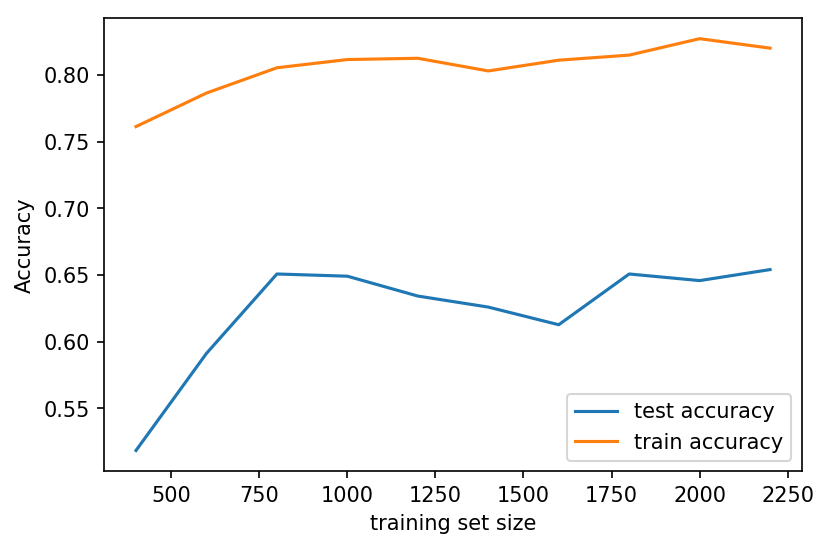

In [18]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 150

test_accuracy = []
train_accuracy=[]
size_settings = [400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200]
parameter_C=[]

for size in size_settings:
    logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=123))
    param_grid = {'logisticregression__C': np.logspace(-6,3,14)}
    grid = GridSearchCV(logreg_pipe, param_grid, cv=5)
    grid.fit(X_train_rep[:size], y_train_rep[:size])
    test_accuracy.append(grid.score(X_TEST_rep, y_TEST_rep))
    train_accuracy.append(grid.score(X_train_rep, y_train_rep))
    parameter_C.append(grid.best_params_['logisticregression__C'])


plt.plot(size_settings, test_accuracy, label="test accuracy")
plt.plot(size_settings, train_accuracy, label="train accuracy")
plt.ylabel("Accuracy")
plt.xlabel("training set size")
plt.legend()

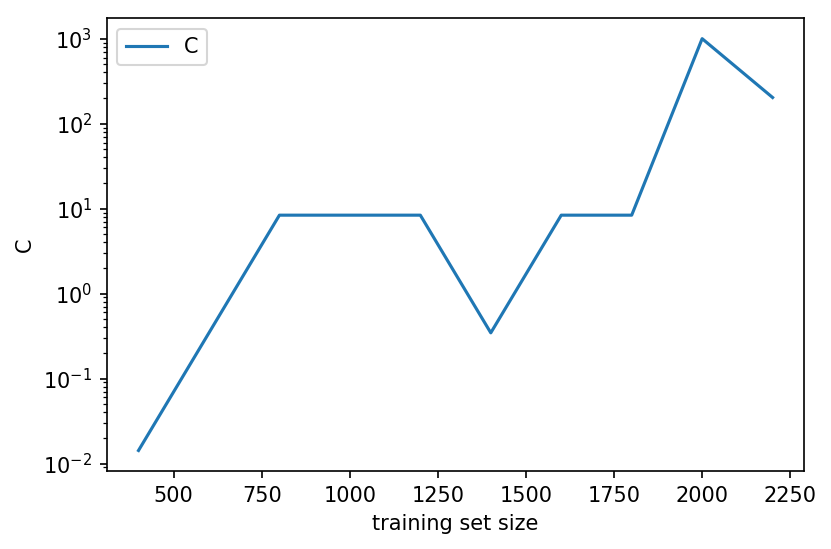

In [19]:
plt.plot(size_settings, parameter_C, label="C")
plt.ylabel("C")
plt.yscale('log')
plt.xlabel("training set size")
plt.legend()

# Feature Importance
3) Third, show which features are most important to make good predictions.

(-1, 51)

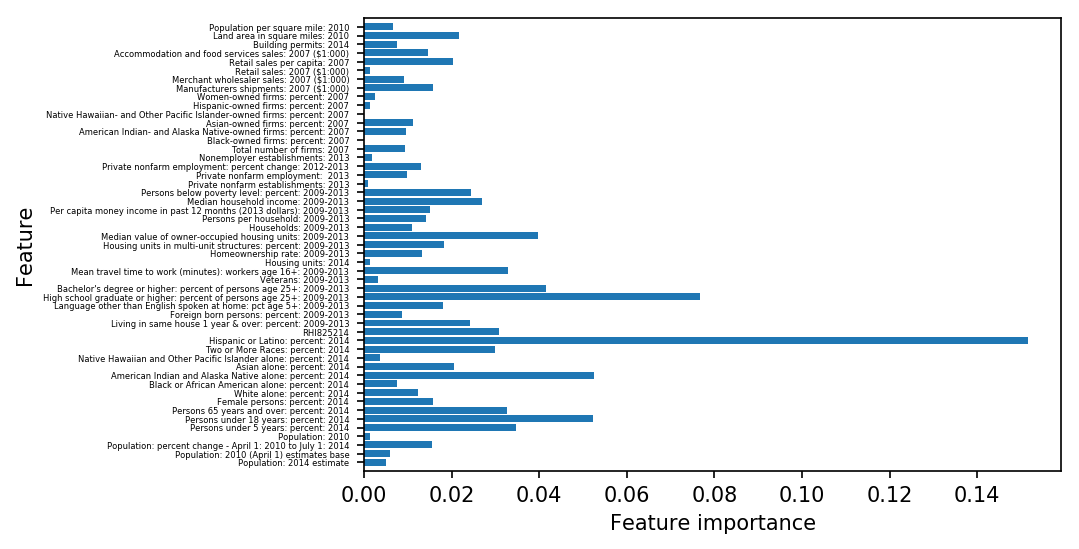

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_rep, y_train_rep)

n_features = len(list(X_train_rep))
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), list(X_train_rep), fontsize=4)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

# Final Evaluation 

In [21]:
logreg_pipe = make_pipeline(PolynomialFeatures(), MinMaxScaler(), LogisticRegression(random_state = 123))
param_grid = {'logisticregression__C': np.logspace(-6, 3, 14)}
grid = GridSearchCV(logreg_pipe, param_grid, cv = 5)
grid.fit(X_train_rep, y_train_rep)
print('The best performance: {:.3f}'.format(grid.score(X_TEST_rep, y_TEST_rep)))

The best performance: 0.692
